# Ejemplo aplicación de problema de optimización básico

A continuación se tienen 3 genradores con los siguiente parámetros:
- Disponibilidad
- Mínimo Técnico
- Precio

Las cargas tiene el valor de cada una.

Se tiene las siguientes restricciones:

- Balance
- Máxima generación
- Mínima generación
- Máxima generación de un grupo de generadores


In [ ]:
# Instalación de la librería para optimización
!pip install mip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 39.3 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


### Se tiene el sigueinte sistema

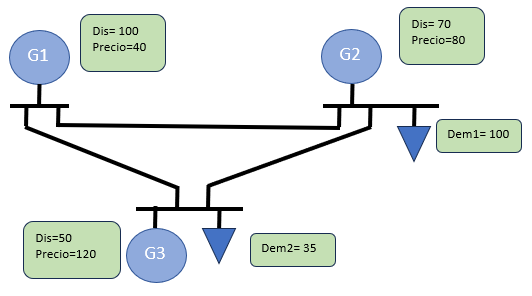


In [1]:
from mip import *

# Parámetros Generadors
pNameGen=['Gen1','Gen2','Gen3']
pDisp = [100, 70, 50]
pPrecio = [40, 80, 120]
pMT = [10, 0, 20]

# Indezación de los generadores
I=range(0,len(pNameGen))

#Parámetros demanda
pNameDem=['D1','D2']
pDem = [100, 35]

# Parámetro de máxima generación en un grupo de generadores
GenMaxGrupo12=130

# Indexación de las cargas
I1=range(0,len(pNameDem))

# Definición del modelo
m = Model(name="DE",sense=MINIMIZE, solver_name=CBC)

# Definición de variables
vGen = [m.add_var(var_type=CONTINUOUS,lb=0) for i in I]
vOnOff = [m.add_var(var_type=BINARY) for i in I]

# Función Objetivo
m.objective = (xsum(vGen[i] * pPrecio[i] for i in I))

# Definición de restricciones
# Balance
m += xsum(vGen[i] for i in I) >= xsum(pDem[i1] for i1 in I1)

for i in I:
    # Restricción máxima generación por plantas
    m += vGen[i] <= pDisp[i] * vOnOff[i]
    # Restricción mínima generación
    m += vGen[i] >= pMT[i] * vOnOff[i]

# Máxima generación en un grupo de plantas
m += vGen[0] + vGen[1] <=  GenMaxGrupo12

# Optimización y Resultados

# Escribir la matriz lp
m.write('model.lp')
m.verbose=0 #Para no imprimir los mensajes del solver en la pantalla. 1 valor por defecto si imprime

# Ejecutar la optimización
status=m.optimize()

# Escribir la solución
m.write('solution.sol')

# Almacenar la solución en una variable
solution=[print('Gen' + str(i) , vGen[i].x) for i in I]

# Obtener el valor de la fución objetivo
FO=m.objective_value
print(FO)

Gen0 100.0
Gen1 15.0
Gen2 20.0
7600.0
